<a href="https://colab.research.google.com/github/Himanshukunar/excelr-assignments/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix)

In [ ]:
# 2. LOAD AND INSPECT DATA
# print("--- 1. Loading and Inspecting Data ---")
try:
    train_df = pd.read_csv('Titanic_train.csv')
    test_df = pd.read_csv('Titanic_test.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'Titanic_train.csv' and 'Titanic_test.csv' are in the same directory.")
    exit()


Data loaded successfully.


In [ ]:
# Initial inspection
print("\n--- Training Data Head ---")
print(train_df.head())
print("\n--- Training Data Info ---")
train_df.info()
print("\n--- Training Data Description ---")
print(train_df.describe())


--- Training Data Head ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [ ]:
# 3. EXPLORATORY DATA ANALYSIS (EDA)

print("\n--- 2. Performing Exploratory Data Analysis ---")
print("Generating plots... (Close plot windows to continue script)")


# Set plot style
sns.set(style='whitegrid')


--- 2. Performing Exploratory Data Analysis ---
Generating plots... (Close plot windows to continue script)


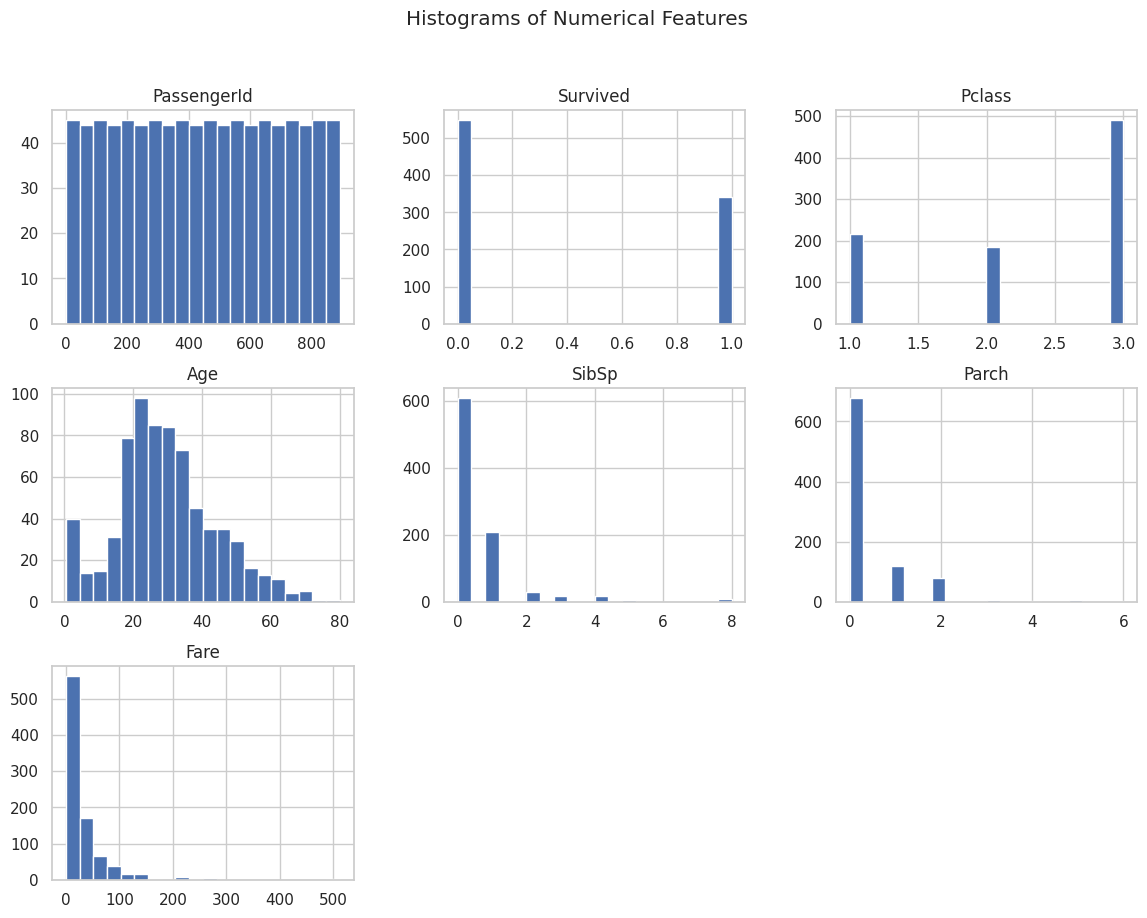

In [ ]:
# Histograms for all numerical features
train_df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

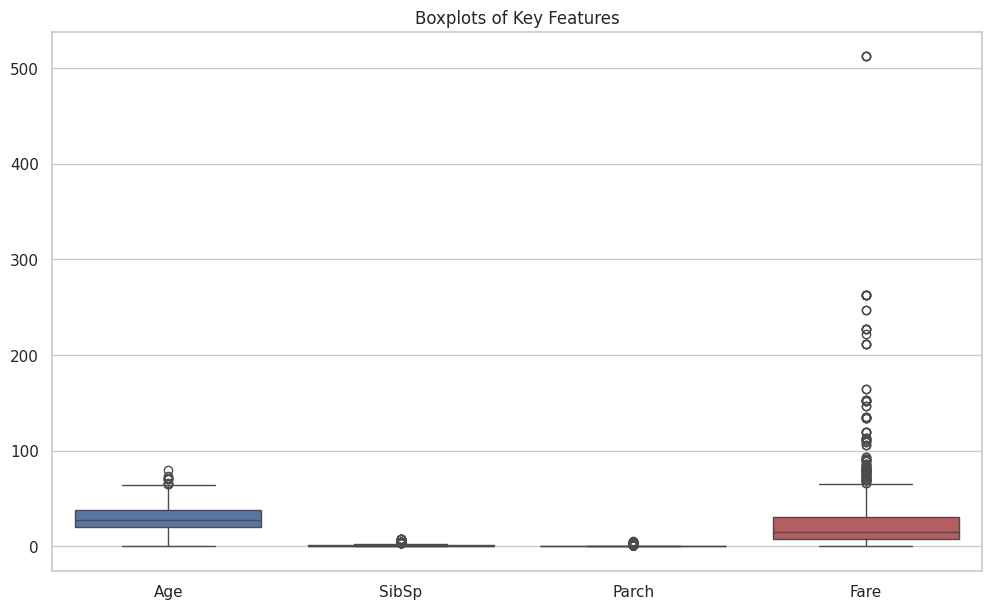

In [ ]:
# Boxplots for key numerical features
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_df[['Age', 'SibSp', 'Parch', 'Fare']])
plt.title("Boxplots of Key Features")
plt.show()

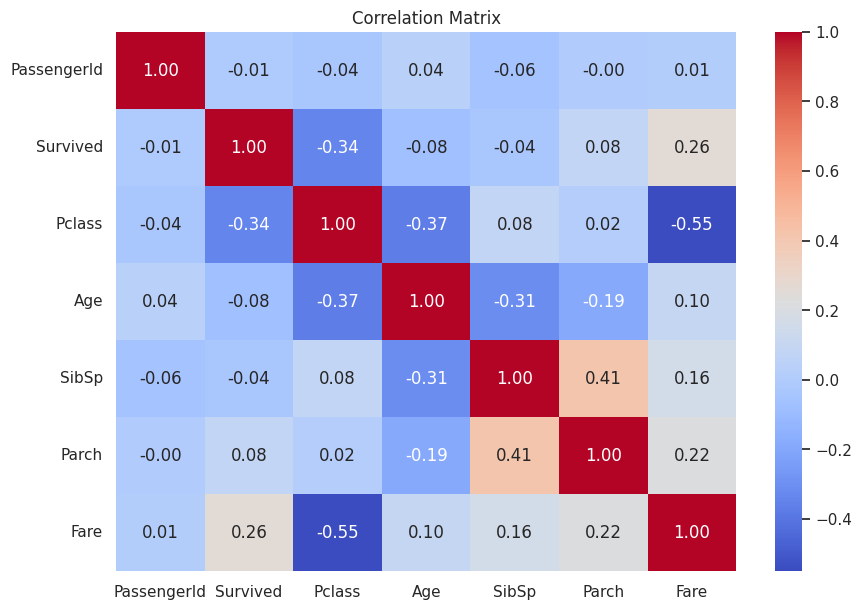

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

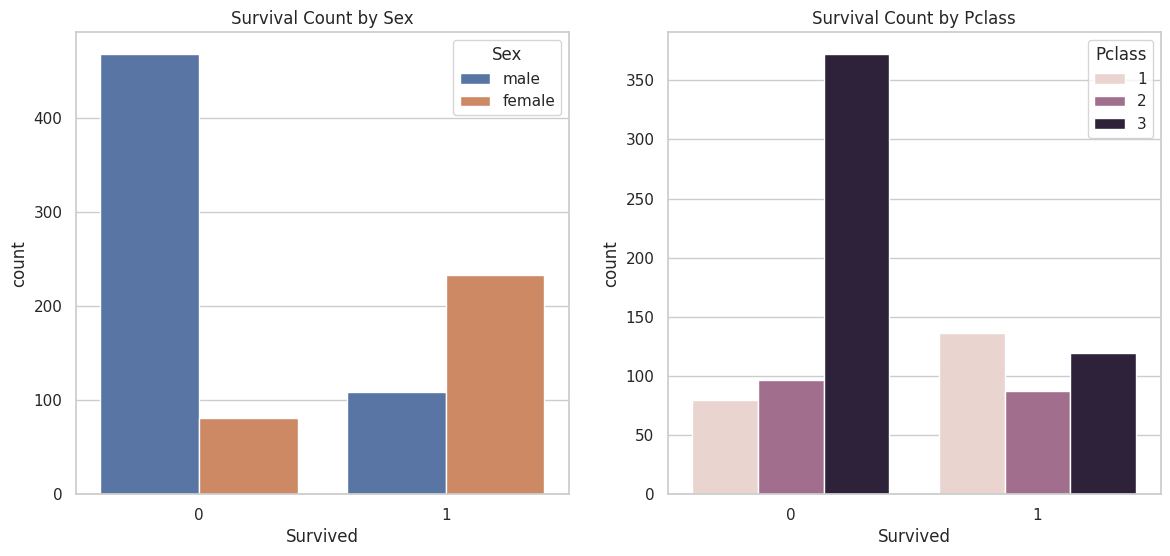

In [ ]:
# Survival Rate by Sex and Pclass
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(ax=axes[0], x='Survived', hue='Sex', data=train_df)
axes[0].set_title('Survival Count by Sex')
sns.countplot(ax=axes[1], x='Survived', hue='Pclass', data=train_df)
axes[1].set_title('Survival Count by Pclass')
plt.show()


In [ ]:
# 4. DATA PREPROCESSING

print("\n--- 3. Preprocessing Data ---")


--- 3. Preprocessing Data ---


In [ ]:
# Drop columns that are not useful or have too many missing values
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Keep PassengerId in test_df for potential submission, will drop before training
test_passenger_ids = test_df['PassengerId']
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Impute missing 'Age' values with the median for each Pclass
for df in [train_df, test_df]:
    df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Impute missing 'Embarked' in training data with the mode
embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(embarked_mode, inplace=True)

/tmp/ipython-input-358178310.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(embarked_mode, inplace=True)


In [ ]:
# Impute missing 'Fare' in test data with the median from the training data
fare_median = train_df['Fare'].median()
test_df['Fare'].fillna(fare_median, inplace=True)

/tmp/ipython-input-2452449893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(fare_median, inplace=True)


In [ ]:
# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
# Separate features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_final_test = test_df.drop('PassengerId', axis=1)

In [ ]:
# Align columns between training and final test set to ensure they match
X, X_final_test = X.align(X_final_test, join='left', axis=1, fill_value=0)
print("Preprocessing complete.")
print("\n--- Processed Training Data Head ---")
print(X.head())


Preprocessing complete.

--- Processed Training Data Head ---
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


In [ ]:
# 5. MODEL BUILDING AND TRAINING

print("\n--- 4. Building and Training the Model ---")


--- 4. Building and Training the Model ---


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.pkl')
print("Model trained and saved as 'logistic_regression_model.pkl'")

Model trained and saved as 'logistic_regression_model.pkl'


In [ ]:
# 6. MODEL EVALUATION

print("\n--- 5. Evaluating the Model ---")


--- 5. Evaluating the Model ---


In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]


In [ ]:
# Print evaluation metrics
print(f"\nAccuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1-score: {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_pred_proba):.4f}")


Accuracy: 0.8156
Precision: 0.7971
Recall: 0.7432
F1-score: 0.7692
ROC-AUC Score: 0.8831



Generating evaluation plots... (Close plot windows to finish)


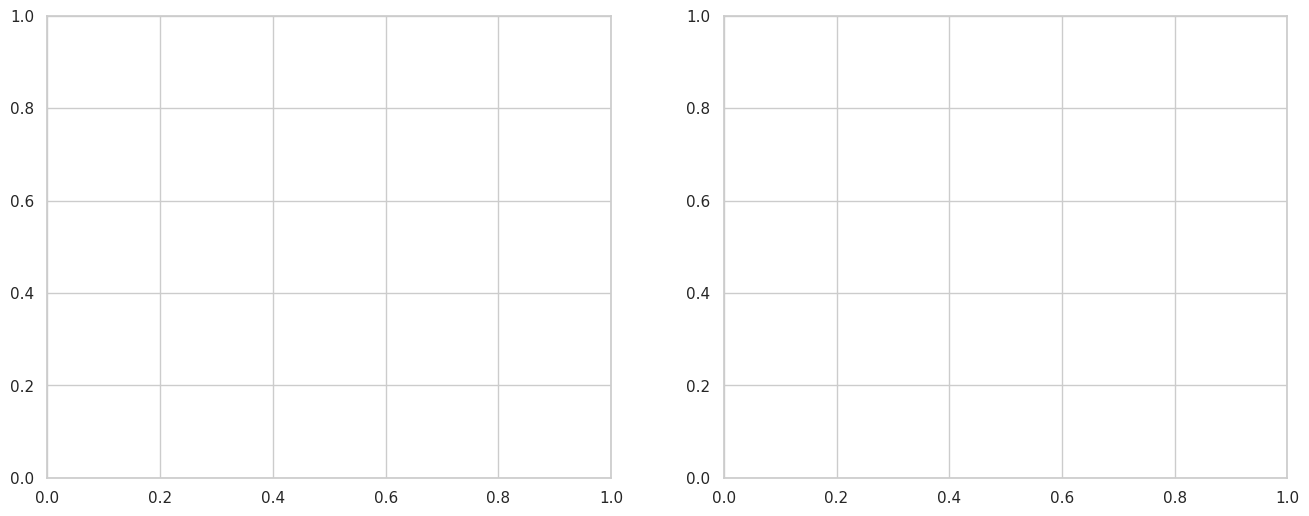

In [ ]:
# Plot ROC Curve and Confusion Matrix
print("\nGenerating evaluation plots... (Close plot windows to finish)")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
axes[0].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_score(y_val, y_pred_proba):.2f})')
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')
axes[1].set_title('Confusion Matrix')
plt.show()

In [ ]:
# 7. MODEL INTERPRETATION

print("\n--- 6. Interpreting the Model ---")


--- 6. Interpreting the Model ---


In [ ]:
# Display model coefficients to understand feature importance
coefficients = pd.DataFrame(model.coef_.T, X_train.columns, columns=['Coefficient'])
coefficients['Odds Ratio'] = np.exp(model.coef_[0])


In [ ]:
print("\n--- Model Coefficients and Odds Ratios ---")
print(coefficients.sort_values(by='Coefficient', ascending=False))

print("\n--- Script Finished ---")


--- Model Coefficients and Odds Ratios ---
            Coefficient  Odds Ratio
Fare           0.002385    1.002387
Age           -0.032787    0.967744
Parch         -0.107867    0.897747
Embarked_Q    -0.152249    0.858775
SibSp         -0.304393    0.737571
Embarked_S    -0.382201    0.682358
Pclass        -0.994872    0.369771
Sex_male      -2.589240    0.075077

--- Script Finished ---
